In [79]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import urllib
import json
import re
import os
import sys
import urllib.request
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [80]:
def get_tags(text, ntags=50):
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    return dict(count.most_common(ntags))


def get_tagslist(result):
    
    return 1

def get_text(data):  
    result_text = ''
    for temp in data:
        result_text = result_text + ' ' +temp[2]
        
    return result_text

def get_text1(data):  
    result_text = ''
    for temp in data:
        result_text = result_text + ' ' +temp
        
    return result_text

def clean_str(s):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r'',s)
    
    cp = re.compile("["
                     u"\U00010000-\U0010FFFF"
                     "]+", flags=re.UNICODE)
    s = cp.sub(r' ',s)
    
    return s.strip()


def Wordcloud(data , savename , maskname=''):
    
    if maskname == '':
        wc = WordCloud( font_path='./font/BMDOHYEON_ttf.ttf' , background_color='white', max_font_size=60, colormap='spring')
    else:
        maskimg = np.array(Image.open(maskname))
        wc = WordCloud(font_path='./font/BMDOHYEON_ttf.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='spring')
        
    wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file(savename + ".png")

In [81]:
def get_googleplay(url, filename):

    driver = webdriver.Chrome('chromedriver.exe')
    driver.implicitly_wait(1)
    driver.get(url)
    driver.maximize_window()
    time.sleep(3)

    for i in range(0,10):
        startheight = (driver.execute_script('return document.body.scrollHeight')) # 스크롤바 시작지점
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight)') # 스크롤바를 화면 밑으로 내림
        time.sleep(2)
        lastheight = (driver.execute_script('return document.body.scrollHeight')) # 현재 스크롤바 위치 저장

        if startheight == lastheight:
            try:
                driver.find_element_by_class_name('CwaK9').click()
            except:
                print('더보기 없음')


    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    data2 = soup.find_all('span', {'jsname':'bN97Pc'})
    data3 = []
    for i in data2:
        hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
        rtext = hangul.sub(r'', i.text)
        data3.append(rtext)
    
    rdata = pd.DataFrame(data3)
    rdata.to_csv('data/당근마켓 구글플레이 댓글.csv')
    
    rtext = get_text1(data3)
    rtags = get_tags(rtext,100)
    Wordcloud(rtags, filename + '워드클라우드')

더보기 없음
더보기 없음


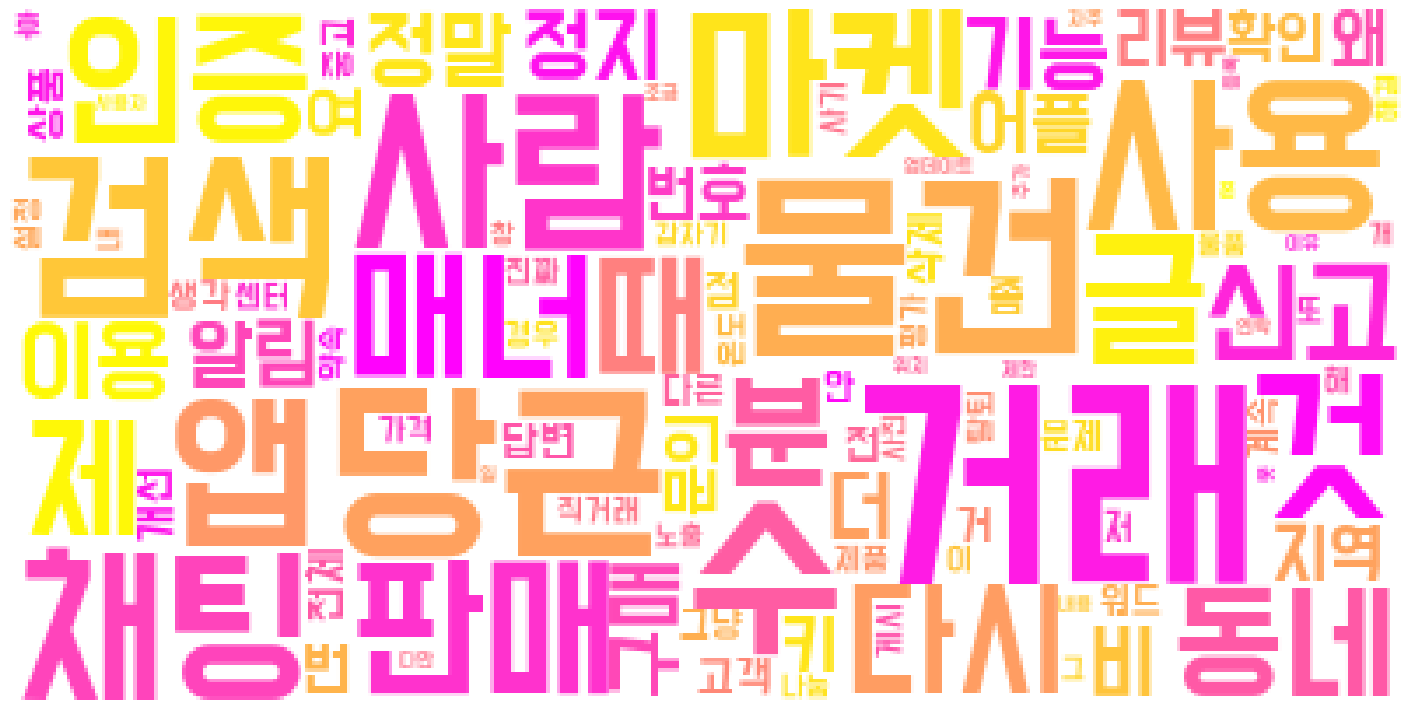

In [83]:
get_googleplay('https://play.google.com/store/apps/details?id=com.towneers.www&showAllReviews=true', '당근마켓')

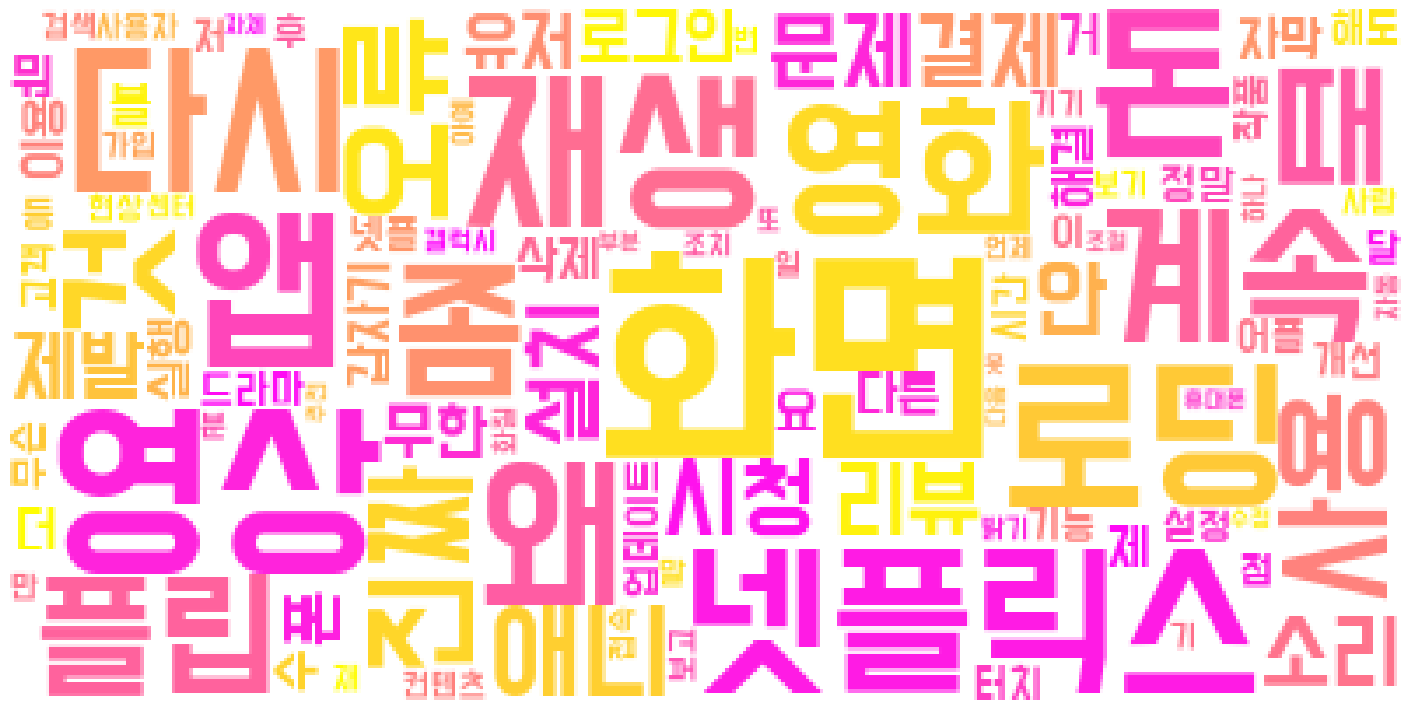

In [84]:
get_googleplay('https://play.google.com/store/apps/details?id=com.netflix.mediaclient&showAllReviews=true', '넷플릭스')